In [30]:
import torch
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA
from patsy import dmatrices

from src.eval import Disease

DATA_DIR = '../data'
#EMBEDDING_FILE = 'mimic_cfm.npy'
#EMBEDDING_FILE = 'mimic_chess.npy'
EMBEDDING_FILE = 'mimic_densenet_mimic.npy'
META_FILE = 'mimic_meta.csv'

#EMBEDDING_FILE = 'chex_chess.npy'
#EMBEDDING_FILE = 'chex_densenet_chex.npy'
#META_FILE = 'chexpert_meta.csv'

STEM = 'MIMIC_CLF'

lims = (-8, 8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from src.utils import get_mimic_meta_data, get_chexpert_meta_data

train_df, val_df, test_df = get_mimic_meta_data(os.path.join(DATA_DIR, META_FILE))
#train_df, val_df, test_df = get_chexpert_meta_data(DATA_DIR)
print(f'DATASET SIZES: TRAIN {len(train_df)} | VAL {len(val_df)} | TEST {len(test_df)}')

emb = np.load(os.path.join(DATA_DIR, EMBEDDING_FILE))
emb = np.nan_to_num(emb)
train_emb = emb[train_df['idx']]
test_emb = emb[test_df['idx']]

DATASET SIZES: TRAIN 181342 | VAL 1413 | TEST 3041


In [32]:
from src.eval import EmbeddingEvaluator

evaluator = EmbeddingEvaluator(train_df, test_df, train_emb, test_emb)

In [33]:
from sklearn.decomposition import PCA

pca_normal = PCA(n_components=2)
pca_normal.fit(evaluator.train_emb)

pca_ortho = PCA(n_components=2)
pca_ortho.fit(evaluator.train_emb_ortho)

test_pca_normal = pca_normal.transform(evaluator.test_emb)
test_pca_ortho = pca_ortho.transform(evaluator.test_emb_ortho)


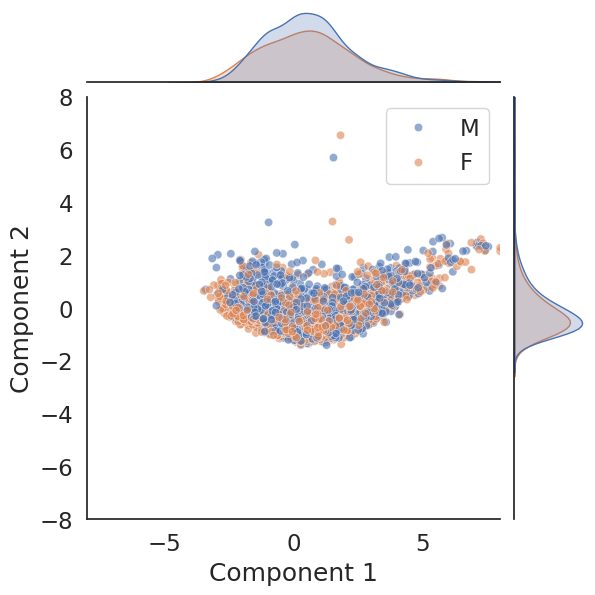

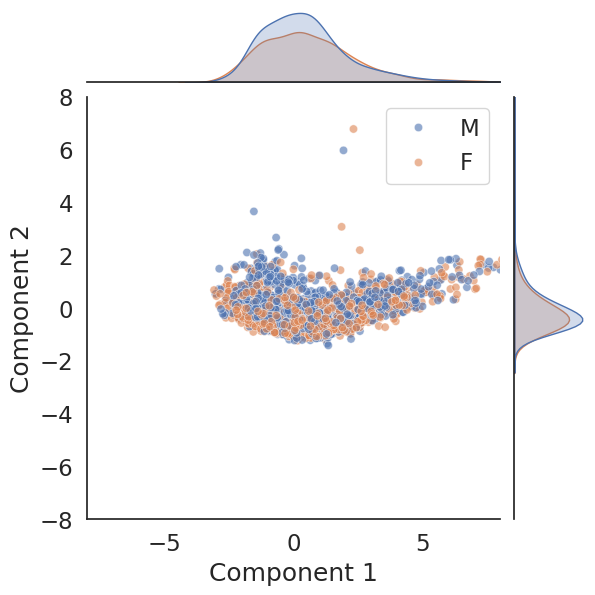

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette=None, font_scale=1.5)
fig = sns.jointplot(
    x=test_pca_normal[:, 0],
    y=test_pca_normal[:, 1],
    hue=evaluator.test_df['sex'],
    kind='scatter',
    alpha=0.6,
    hue_order=['M', 'F'],
    ylim=lims,
    xlim=lims
)
fig.set_axis_labels('Component 1', 'Component 2')
fig.ax_joint.legend(loc='upper right')
plt.savefig(f'../figs/{STEM}_sex_normal.jpg', bbox_inches='tight', dpi=600)
plt.show()
plt.close()

fig = sns.jointplot(
    x=test_pca_ortho[:, 0],
    y=test_pca_ortho[:, 1],
    hue=evaluator.test_df['sex'],
    kind='scatter',
    alpha=0.6,
    hue_order=['M', 'F'],
    ylim=lims,
    xlim=lims
)
fig.set_axis_labels('Component 1', 'Component 2')
fig.ax_joint.legend(loc='upper right')
plt.savefig(f'../figs/{STEM}_sex_ortho.jpg', bbox_inches='tight', dpi=600)
plt.show()
plt.close()

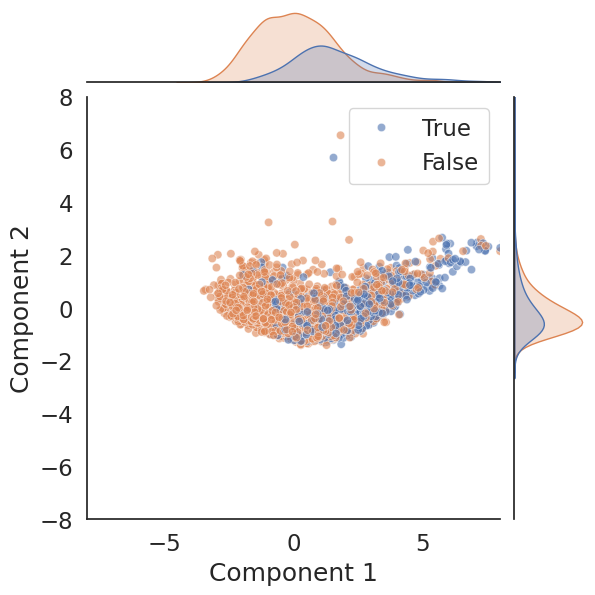

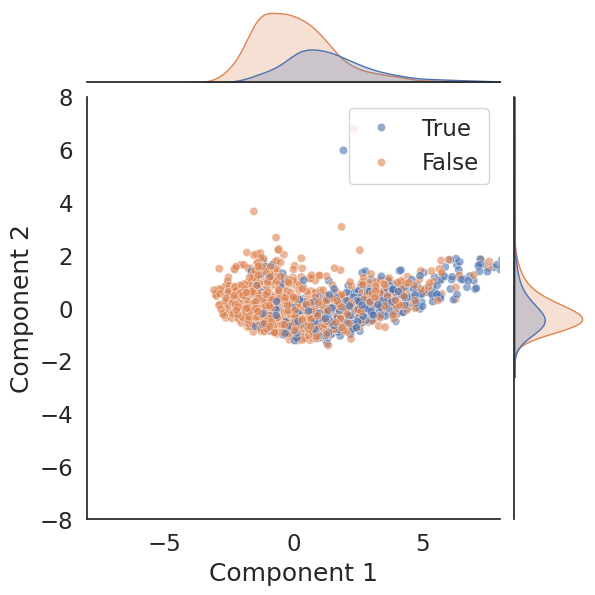

In [35]:
fig = sns.jointplot(
    x=test_pca_normal[:, 0],
    y=test_pca_normal[:, 1],
    hue=(evaluator.test_df[Disease.PLEURAL_EFFUSION.value] == 1).astype(bool),
    kind='scatter',
    alpha=0.6,
    hue_order=[True, False],
    ylim=lims,
    xlim=lims
)
fig.set_axis_labels('Component 1', 'Component 2')
fig.ax_joint.legend(loc='upper right')
plt.savefig(f'../figs/{STEM}_pleural_normal.jpg', bbox_inches='tight', dpi=600)
plt.show()
plt.close()

fig = sns.jointplot(
    x=test_pca_ortho[:, 0],
    y=test_pca_ortho[:, 1],
    hue=(evaluator.test_df[Disease.PLEURAL_EFFUSION.value] == 1).astype(bool),
    kind='scatter',
    alpha=0.6,
    hue_order=[True, False],
    ylim=lims,
    xlim=lims
)
fig.set_axis_labels('Component 1', 'Component 2')
fig.ax_joint.legend(loc='upper right')
plt.savefig(f'../figs/{STEM}_pleural_ortho.jpg', bbox_inches='tight', dpi=600)
plt.show()
plt.close()

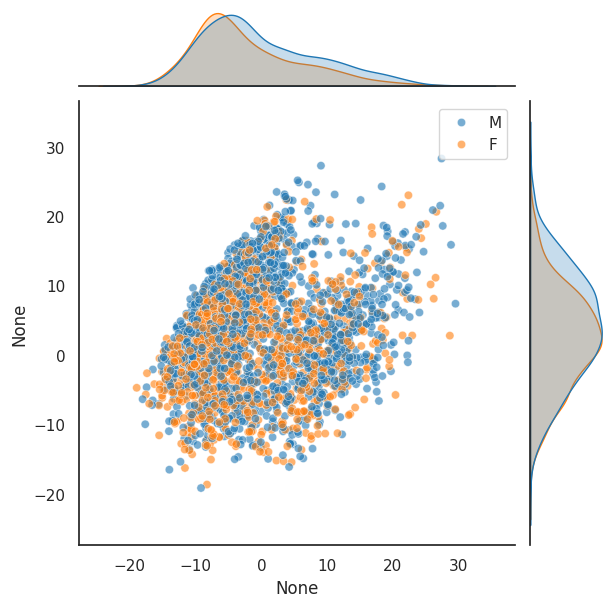

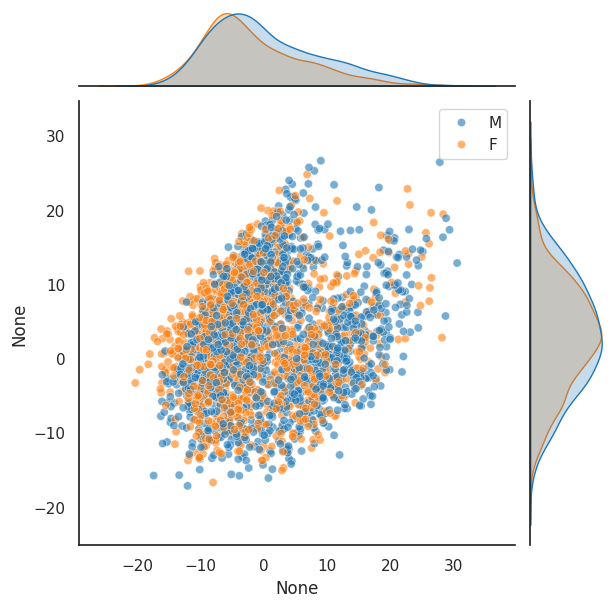

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca_normal[:, 0],
    y=test_pca_normal[:, 1],
    hue=evaluator.test_df['sex'],
    kind='scatter',
    alpha=0.6,
    hue_order=['M', 'F'],
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca_ortho[:, 0],
    y=test_pca_ortho[:, 1],
    hue=evaluator.test_df['sex'],
    kind='scatter',
    alpha=0.6,
    hue_order=['M', 'F'],
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

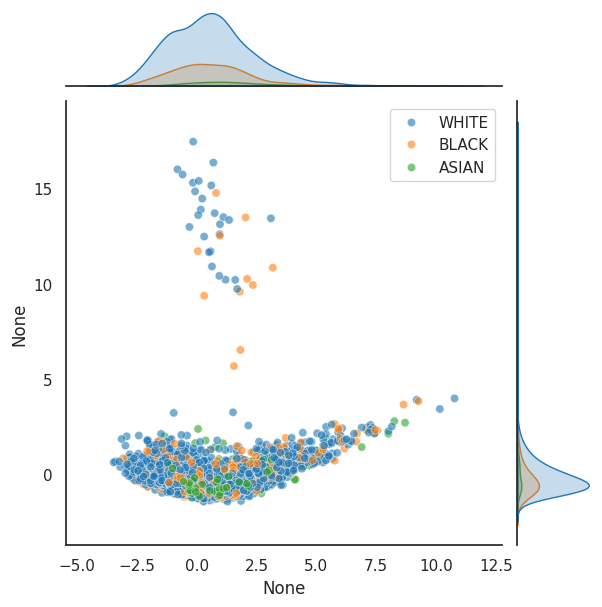

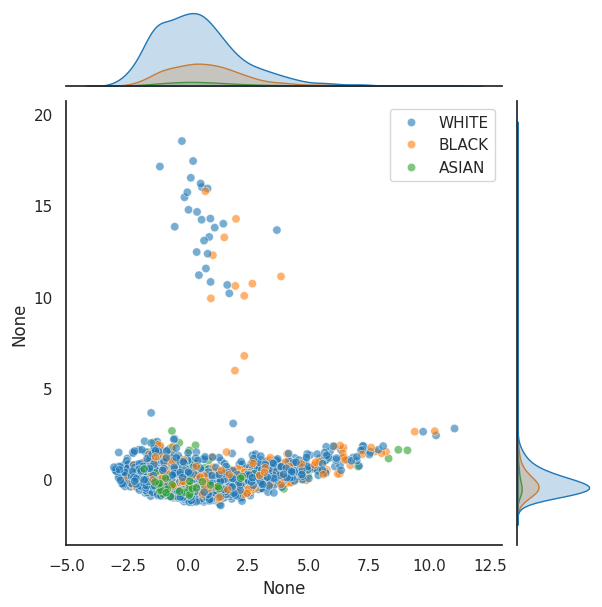

In [104]:
sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca_normal[:, 0],
    y=test_pca_normal[:, 1],
    hue=evaluator.test_df['race'],
    kind='scatter',
    alpha=0.6,
    hue_order=['WHITE', 'BLACK', 'ASIAN'],
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca_ortho[:, 0],
    y=test_pca_ortho[:, 1],
    hue=evaluator.test_df['race'],
    kind='scatter',
    alpha=0.6,
    hue_order=['WHITE', 'BLACK', 'ASIAN'],
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

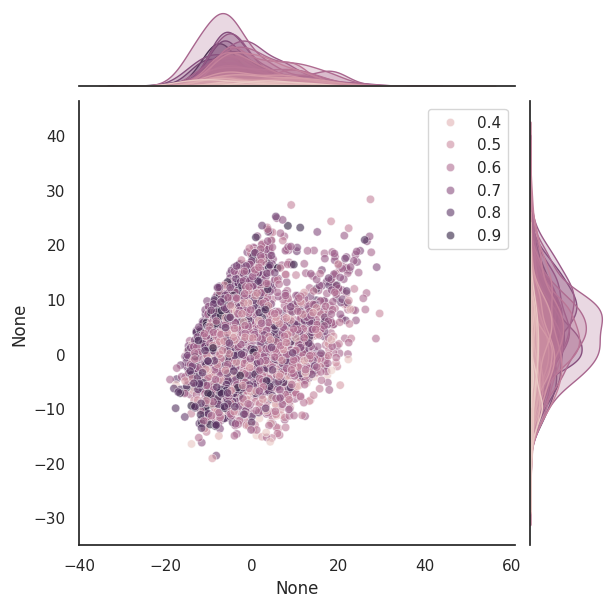

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca[:, 0],
    y=test_pca[:, 1],
    hue=evaluator.test_df['age'],
    kind='scatter',
    alpha=0.6,
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(evaluator.train_emb_ortho)
test_pca = pca.transform(evaluator.test_emb_ortho)

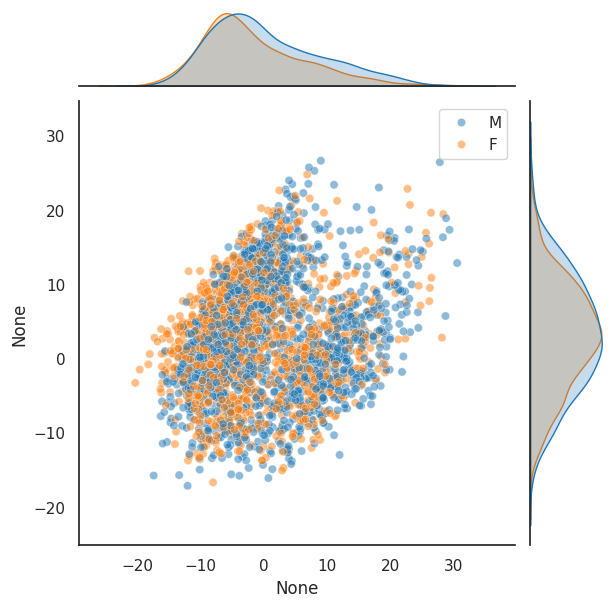

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca[:, 0],
    y=test_pca[:, 1],
    hue=evaluator.test_df['sex'],
    kind='scatter',
    alpha=0.5,
    hue_order=['M', 'F'],
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

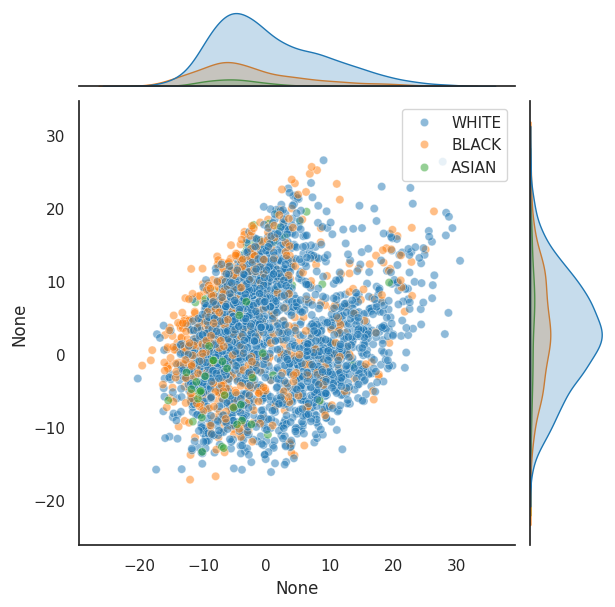

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca[:, 0],
    y=test_pca[:, 1],
    hue=evaluator.test_df['race'],
    kind='scatter',
    alpha=0.5,
    hue_order=['WHITE', 'BLACK', 'ASIAN'],
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

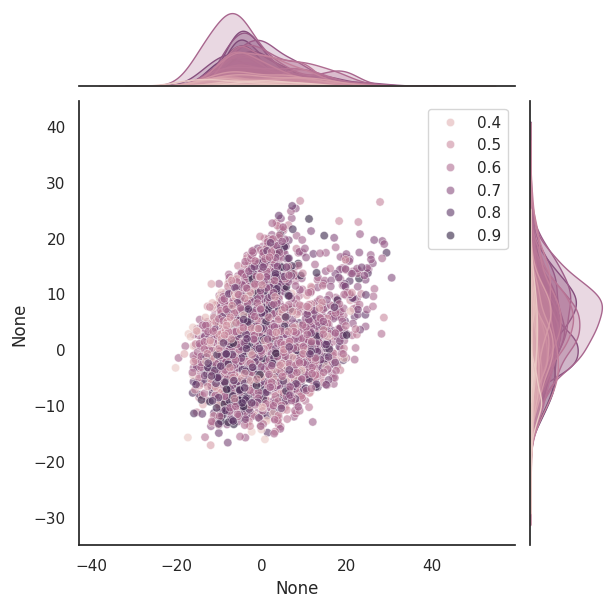

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_pca[:, 0],
    y=test_pca[:, 1],
    hue=evaluator.test_df['age'],
    kind='scatter',
    alpha=0.6,
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

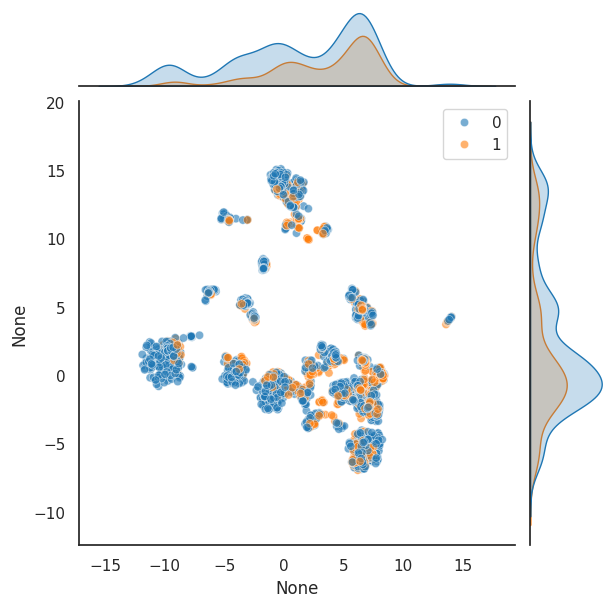

In [61]:
import umap

# fit with UMAP
u = umap.UMAP(n_components=2)
u.fit(evaluator.train_emb)

test_u = u.transform(evaluator.test_emb)

sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_u[:, 0],
    y=test_u[:, 1],
    hue=(evaluator.test_df[Disease.PLEURAL_EFFUSION.value] == 1).astype(int),
    kind='scatter',
    alpha=0.6,
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()

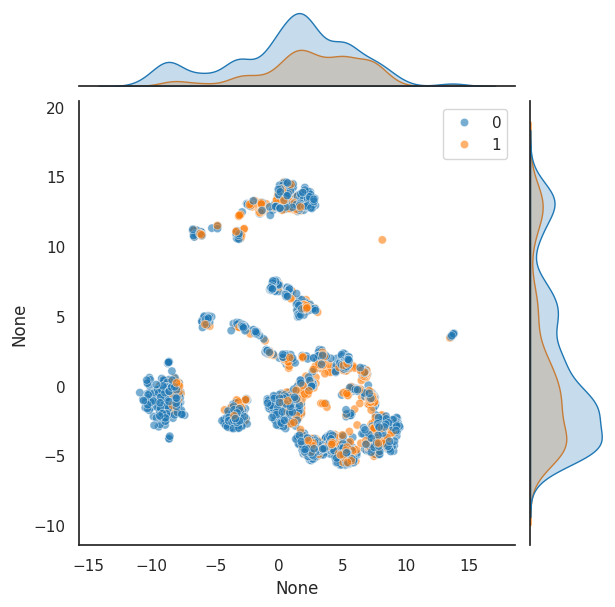

In [62]:
import umap

# fit with UMAP
u = umap.UMAP(n_components=2)
u.fit(evaluator.train_emb_ortho)

test_u = u.transform(evaluator.test_emb_ortho)

sns.set_theme(style='white', palette=None)
fig = sns.jointplot(
    x=test_u[:, 0],
    y=test_u[:, 1],
    hue=(evaluator.test_df[Disease.PLEURAL_EFFUSION.value] == 1).astype(int),
    kind='scatter',
    alpha=0.6,
    joint_kws=dict(rasterized=True)
)
fig.ax_joint.legend(loc='upper right')
plt.show()